# Global analysis
For gps+argos, drogued, <25km, <30min

In [113]:
import numpy as np
import pandas as pd
import xarray as xr
from scipy.stats import bootstrap

import dask.dataframe as dd
import os
from glob import glob

import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms

import histlib.matchup as match
from  histlib.diagnosis import build_matchup_dataframe, synthetic_figure, path_csv, put_fig_letter, lonlat_stats
from histlib.cstes import labels, zarr_dir, matchup_dir, c0, U
U2 = U**2

In [2]:
DL, DT = 25e3, 30*60
# if not already generated
comb_av_d = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_drifter_ggx_adt', 'wd':'es_cstrio_z15_drifter_wd_x'}
comb_av_al = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_drifter_ggx_adt', 'wd':'es_cstrio_z15_alti_wd_x'}
comb_alg = {'acc':'drifter_acc_x_25','cor':'drifter_coriolis_x_25','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}

#df_av_d = build_matchup_dataframe(comb_av_d, 'both', True, DL, DT, store=True)
#df_av_al = build_matchup_dataframe(comb_av_al, 'both', True, DL, DT, store=True)
#df_alg = build_matchup_dataframe(comb_alg, 'both', True, DL, DT, store=True)

df_av_d = dd.read_csv(path_csv(comb_av_d, 'both', True, DL, DT)).repartition(npartitions=10).persist()
df_av_al = dd.read_csv(path_csv(comb_av_al, 'both', True, DL, DT))
df_alg = dd.read_csv(path_csv(comb_alg, 'both', True, DL, DT)).repartition(npartitions=10).persist()

In [3]:
def global_stast(df):
    from histlib.cstes import U
    #Mean
    mean = df.mean().compute()
    nb_coloc = len(df)
    mean['nb_coloc'] = nb_coloc

    #Central limit theorem
    errors = (2*df.std()/np.sqrt(nb_coloc)).compute()

    df = pd.DataFrame([mean, errors],index=['value','errors']).transpose()/(U**2)

    df['percentage']= df.value/df.value.sigma *100
    df['percentage_erros']= df.percentage * np.sqrt((df.errors/df.value)**2 +(df.errors.sigma/df.value.sigma)**2)

    return df

_________________
# Along-track

In [4]:
DL, DT = 25e3, 30*60
comb_alg = {'acc':'drifter_acc_x_25','cor':'drifter_coriolis_x_25','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}
df_alg = dd.read_csv(path_csv(comb_alg, 'both', True, DL, DT)).repartition(npartitions=10)

In [5]:
len(df_alg)

239203

In [40]:
dfalg = global_stast(df_alg)
dfalg

,value,errors,percentage,percentage_erros
obs,5.750261e+14,2.090045e+12,6.858768e+15,7.755345e+13
acc,3.906361e+02,4.228043e+02,4.659411e+03,5.043352e+03
cor,-2.229967e+02,8.182263e+02,-2.659850e+03,-9.759641e+03
drogue_status,1.039111e+10,0.000000e+00,1.239426e+11,1.327064e+09
ggx,1.970851e+03,7.609455e+02,2.350782e+04,9.079858e+03
wd,-1.304171e+02,1.715550e+02,-1.555583e+03,-2.046334e+03
alti___distance,1.326366e+14,2.974264e+11,1.582056e+15,1.730673e+13
alti___time_difference,9.049134e+12,2.209272e+10,1.079358e+14,1.185341e+12
lat,4.097575e+10,1.680418e+09,4.887485e+11,2.071548e+10
lon,-1.165983e+11,4.384160e+09,-1.390756e+12,-5.437201e+10


_________________
# AVISO drifter

In [8]:
DL, DT = 25e3, 30*60
comb_av_d = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_drifter_ggx_adt', 'wd':'es_cstrio_z15_drifter_wd_x'}
df_av_d = dd.read_csv(path_csv(comb_av_d, 'both', True, DL, DT)).repartition(npartitions=10).persist()

In [36]:
len(df_av_d)

238169

In [9]:
dfd = global_stast(df_av_d)
dfd

,value,errors,percentage,percentage_erros
obs,5.745718e+14,2.092100e+12,8.173280e+15,9.528095e+13
acc,4.052289e+02,4.229353e+02,5.764379e+03,6.016589e+03
cor,-3.581029e+02,8.190157e+02,-5.094012e+03,-1.165063e+04
drogue_status,1.039111e+10,0.000000e+00,1.478135e+11,1.636944e+09
ggx,2.656450e+02,5.895306e+02,3.778797e+03,8.386173e+03
wd,-1.255539e+02,1.721115e+02,-1.786004e+03,-2.448364e+03
alti___distance,1.326108e+14,2.981045e+11,1.886387e+15,2.131663e+13
alti___time_difference,9.048973e+12,2.214287e+10,1.287216e+14,1.459897e+12
lat,3.953271e+10,1.682526e+09,5.623526e+11,2.473089e+10
lon,-1.171412e+11,4.396924e+09,-1.666333e+12,-6.521169e+10


_________________
# AVISO alti

In [10]:
DL, DT = 25e3, 30*60
comb_av_a = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_alti_ggx_adt', 'wd':'es_cstrio_z15_drifter_wd_x'}
df_av_a = dd.read_csv(path_csv(comb_av_a, 'both', True, DL, DT)).repartition(npartitions=10).persist()

In [10]:
len(df_av_a)

238552

In [11]:
dfa = global_stast(df_av_a)
dfa

,value,errors,percentage,percentage_erros
obs,5.746562e+14,2.091153e+12,8.132948e+15,9.446176e+13
acc,4.300143e+02,4.227919e+02,6.085872e+03,5.984032e+03
cor,-3.454547e+02,8.187825e+02,-4.889123e+03,-1.158812e+04
drogue_status,1.039111e+10,0.000000e+00,1.470625e+11,1.622088e+09
ggx,4.651135e+02,5.936296e+02,6.582621e+03,8.401786e+03
wd,-1.275473e+02,1.719256e+02,-1.805142e+03,-2.433296e+03
alti___distance,1.326408e+14,2.978425e+11,1.877228e+15,2.113040e+13
alti___time_difference,9.049061e+12,2.212368e+10,1.280688e+14,1.446875e+12
lat,4.010998e+10,1.682038e+09,5.676652e+11,2.461507e+10
lon,-1.170695e+11,4.392036e+09,-1.656852e+12,-6.479002e+10


________________
# Synthetic figures

In [147]:
def synthetic_figure(df, ax, xlim=None, aviso=False) :
    from histlib.cstes import U
    plt.rcParams["axes.edgecolor"] = "w"
    a=1.5
    bbox = dict(facecolor='w', alpha=0.8, edgecolor='w')
    
    ts = df['sigma']
    print(ts)
    #gap between bars for readability
    if xlim : b=xlim/400
    else : b=ts/400

    #b = 1e-10
    
    ## INDIVIDUAL MS ##
    ax.barh(2*a, df['ACC'], color= c0['acc'], label = 'Lagrangian acceleration')
    ax.barh(2*a, df['COR'], left =df['ACC']+b , color= c0['cor'], label = 'Coriolis acceleration')
    ax.barh(2*a, df['GGX'], left =df['ACC']+df['COR']+2*b , color= c0['ggx'], label = 'Pressure gradient term')
    ax.barh(2*a, df['WD'], left =df['ACC']+df['COR']+df['GGX']+3*b, color= c0['wd'], label = 'Wind term')
    

    ax.text(ts/2, 2*a+0.5, r'Individual MS $A_i$', ha='center') 
    #percentage + MS
    key = ['ACC', 'COR', 'GGX', 'WD']
    for i in range(len(key)) :
        ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 2*a, f'{int(np.rint((df[key[i]]/ts)*100))} %', ha='center',bbox=bbox )
        ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 2*a-0.55, f'{np.round(df[key[i]],2)}', ha='center')

    #accolade
    c = 1e-12*U**2
    id1 =0
    id2 = ts + 3*b
    bx = [id1, id1, id2, id2]
    by = [3.70, 3.75, 3.75, 3.70]
    ax.plot(bx, by, 'k-', lw=2)
    ax.text(ts, 3.8, r'$\Sigma$', fontsize=15, ha='center')
    
    ## CAPTURED PHYSICAL + ERRORS PARTS ##
    plt.rcParams['hatch.linewidth'] = 8
    plt.rcParams['hatch.color'] = 'lightgrey'
    ax.barh(1*a, df['B_acc'], color= c0['acc'])
    ax.barh(1*a, df['E_acc'], left = df['B_acc'], color= c0['acc'], hatch='/')
    ax.barh(1*a, df['B_cor'], left =df['B_acc']+df['E_acc']+b, color= c0['cor'])
    ax.barh(1*a, df['E_cor'], left =df['B_acc']+df['E_acc']+ df['B_cor'], color= c0['cor'], hatch='/')
    ax.barh(1*a, df['B_ggx'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+b, color= c0['ggx'])
    if df['E_ggx']>0 : 
        ax.barh(1*a, df['E_ggx'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+df['B_ggx'], color= c0['ggx'], hatch='/')
        ax.barh(1*a, df['B_wd'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+df['B_ggx']+df['E_ggx']+b, color= c0['wd'])
        ax.barh(1*a, df['E_wd'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+df['B_ggx']+df['E_ggx']+df['B_wd'], color= c0['wd'], hatch='/')
    else : 
        ax.barh(1*a, df['B_wd'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+df['B_ggx']+2*b, color= c0['wd'])
        ax.barh(1*a, df['E_wd'], left =df['B_acc']+df['E_acc']+ df['B_cor']+ df['E_cor']+df['B_ggx']+df['B_wd']+2*b, hatch='/', color= c0['wd'])
        ax.barh(1*a, -df['E_ggx'], left =-b + df['E_ggx'], color= c0['ggx'], hatch='/',)
    
    ax.text(ts/2, 1*a+0.5, r'Balanced and errors parts MS $\beta_i$ and $\epsilon_i$', ha='center') 
            
    #percentage + MS
    key = ['B_acc','E_acc', 'B_cor','E_cor', 'B_ggx','E_ggx', 'B_wd', 'E_wd']
    for i in range(len(key)) :
        d=0#vertical +
        dx=0# horizontal + on MS
        dxx=0# horizontal + on percentage
        if i==len(key)-1 : 
            d=-0.1*a 
            dx = 3e-11/U2
            dxx = 1.5e-11/U2
        if i==len(key)-2 : d=0.1*a 
        if abs(int(np.rint((df[key[i]]/ts)*100)))>0: #does not plot percentage below 1%
            if df[key[i]]>0 : 
                ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b/2+dxx, a+d, f'{int(np.rint((df[key[i]]/ts)*100))} %', ha='center', bbox=bbox)
            else : 
                ax.text(df[key[i]]/2-dxx, a+d, f'{int(np.rint((df[key[i]]/ts)*100))} %', ha='center', bbox=bbox)
        d=0        
        if i%2 ==1 : d=-0.1*a
        ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b/2+dx, a+d -0.55, f'{np.round(df[key[i]],2)}', ha='center')
        
    ## PAIRS + RESIDUAL ##
    plt.rcParams['hatch.linewidth'] = 8
    plt.rcParams['hatch.color'] = c0['ggx']
    ax.barh(0, df['X_cor_ggx'], color=c0['cor'], hatch='/')
    plt.rcParams['hatch.color'] = c0['cor']
    ax.barh(0, df['X_acc_cor'], color=c0['acc'], hatch='/', left = df['X_cor_ggx']+b)
    plt.rcParams['hatch.color'] = c0['acc']
    ax.barh(0, df['X_acc_ggx'], color=c0['ggx'], hatch='/', left = df['X_cor_ggx']+df['X_acc_cor']+2*b)
    plt.rcParams['hatch.color'] = c0['wd']
    ax.barh(0, df['X_cor_wd'], color=c0['cor'], hatch='/', left = df['X_cor_ggx']+df['X_acc_cor']+df['X_acc_ggx']+3*b)
    ax.barh(0, df['S'], label='Errors', color='lightgrey', left = df['X_cor_ggx']+df['X_acc_cor']+df['X_acc_ggx']+df['X_cor_wd']+4*b)
    #negative contribution
    plt.rcParams['hatch.color'] = c0['acc']
    ax.barh(0, -df['X_acc_wd'], color=c0['wd'], hatch='/', left = df['X_acc_wd']-b)
    plt.rcParams['hatch.color'] = c0['ggx']
    ax.barh(0, -df['X_ggx_wd'], color=c0['wd'], hatch='/', left = df['X_acc_wd']+df['X_ggx_wd']-2*b)
    

    tts = df['X_cor_ggx']+df['X_acc_cor']+df['X_acc_ggx']+df['X_cor_wd']+4*b+df['S']
    print(tts)
    sum_pairs = df['X_cor_ggx']+df['X_acc_cor']+df['X_acc_ggx']+df['X_cor_wd']+3*b
    ax.text(sum_pairs/2, 0.6, r"Pairs' contributions $X_{ij}$", ha='center')

    
    #accolade
    c = 1e-12
    id1 = 0
    id2 = sum_pairs
    bx = [id1, id1, id2, id2]
    by = [0.45, 0.5, 0.5, 0.45]
    #ax.plot(bx, by, 'k-', lw=2)
    ax.text(sum_pairs + df['S']/2, 0.5, r'$S$', ha='center')

    #percentage + MS
    from itertools import combinations
    correlation = list(combinations(['acc', 'cor', 'ggx', 'wd'], 2))
    key = ['X_cor_ggx', 'X_acc_cor','X_acc_ggx','X_cor_wd']
    for i in range(len(key)) :
        d=0
        if aviso and key[i]== 'X_acc_ggx' : d = -0.1*a
        
        if abs(int(np.rint((df[key[i]]/ts)*100)))>0: #does not plot percentage below 1%
            ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 0+d*2, f'{int(np.rint((df[key[i]]/ts)*100))} %', ha='center', bbox=bbox)
        
        ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 0-0.55+d, f'{np.round(df[key[i]],2)}', ha='center')
        
    #negative contribution     
    key = ['X_acc_wd', 'X_ggx_wd']
    for i in range(len(key)) :
        if abs(int(np.rint((df[key[i]]/ts)*100)))>0:
            ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 0, f'{int(np.rint((df[key[i]]/ts)*100))} %', ha='center', bbox=bbox)
        d=0        
        if i%2 ==1 : d=-0.1*a
        ax.text(sum([df[v] for v in key[:i]])+df[key[i]]/2+i*b, 0-0.55+d, f'{np.round(df[key[i]],2)}', ha='center')
    
    key = ['X_cor_ggx', 'X_acc_cor','X_acc_ggx','X_cor_wd']
    ax.text(sum([df[v] for v in key])+df['S']/2+i*b, 0, f'{int(np.rint((df["S"]/ts)*100))} %', ha='center', bbox=bbox)
    ax.text(sum([df[v] for v in key])+df['S']/2+i*b, 0-0.55, f'{np.round(df["S"],2)}', ha='center')

    # FIGURE SET
    ax.set_yticks([])
    if not xlim : xlim=tts
    ax.axvline(0, ls=':', c='grey')
    ax.set_xlim(-0.5, xlim+0.5)
    ax.set_ylim(-1, 4.1)
    ax.get_yaxis().set_visible(False)
    ax.annotate('',xy=(xlim,-1),xytext=(-0.5,-1),arrowprops={'arrowstyle':'->', 'facecolor':'k'})
    ax.set_xlabel(r'$[U^2]$')


8.383810273600547
8.616672494488125
7.029880874668106
7.262493649620944


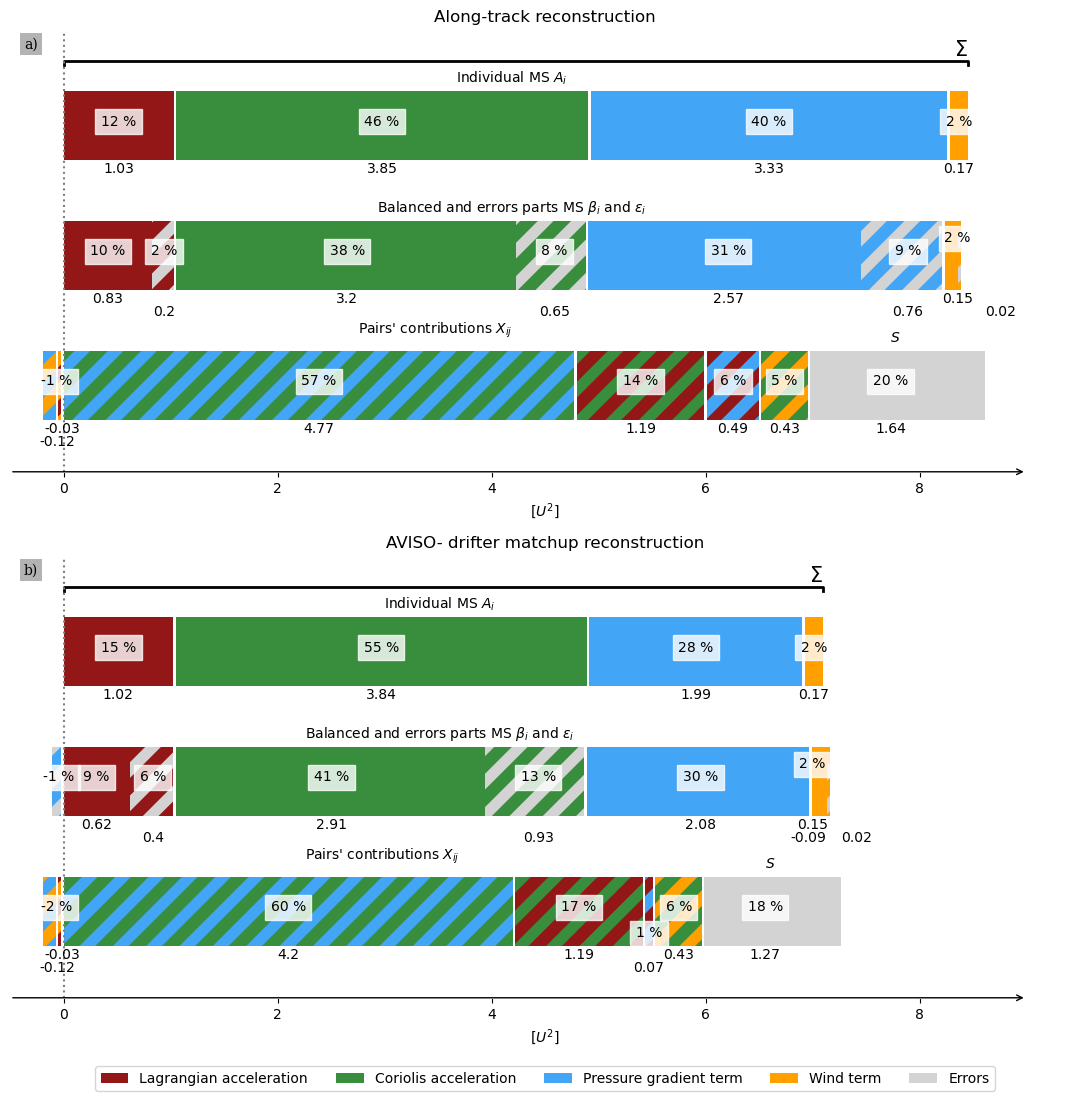

In [148]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )
plt.rcParams["axes.edgecolor"] = "w"

synthetic_figure(dfalg.value, axs[0], xlim=9) 
synthetic_figure(dfd.value, axs[1], xlim=9, aviso=True) 

axs[0].set_title('Along-track reconstruction')
axs[1].set_title('AVISO- drifter matchup reconstruction')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(fig, axs[0], 'a')
put_fig_letter(fig, axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
#fig.savefig('../images_all/synth_samex.png',bbox_inches='tight',   dpi=300)
#fig.savefig('../images_all/synth_samex.jpeg',bbox_inches='tight',   dpi=300)

8.383810273600547
8.616672494488125
7.06578034776425
7.298903015963676


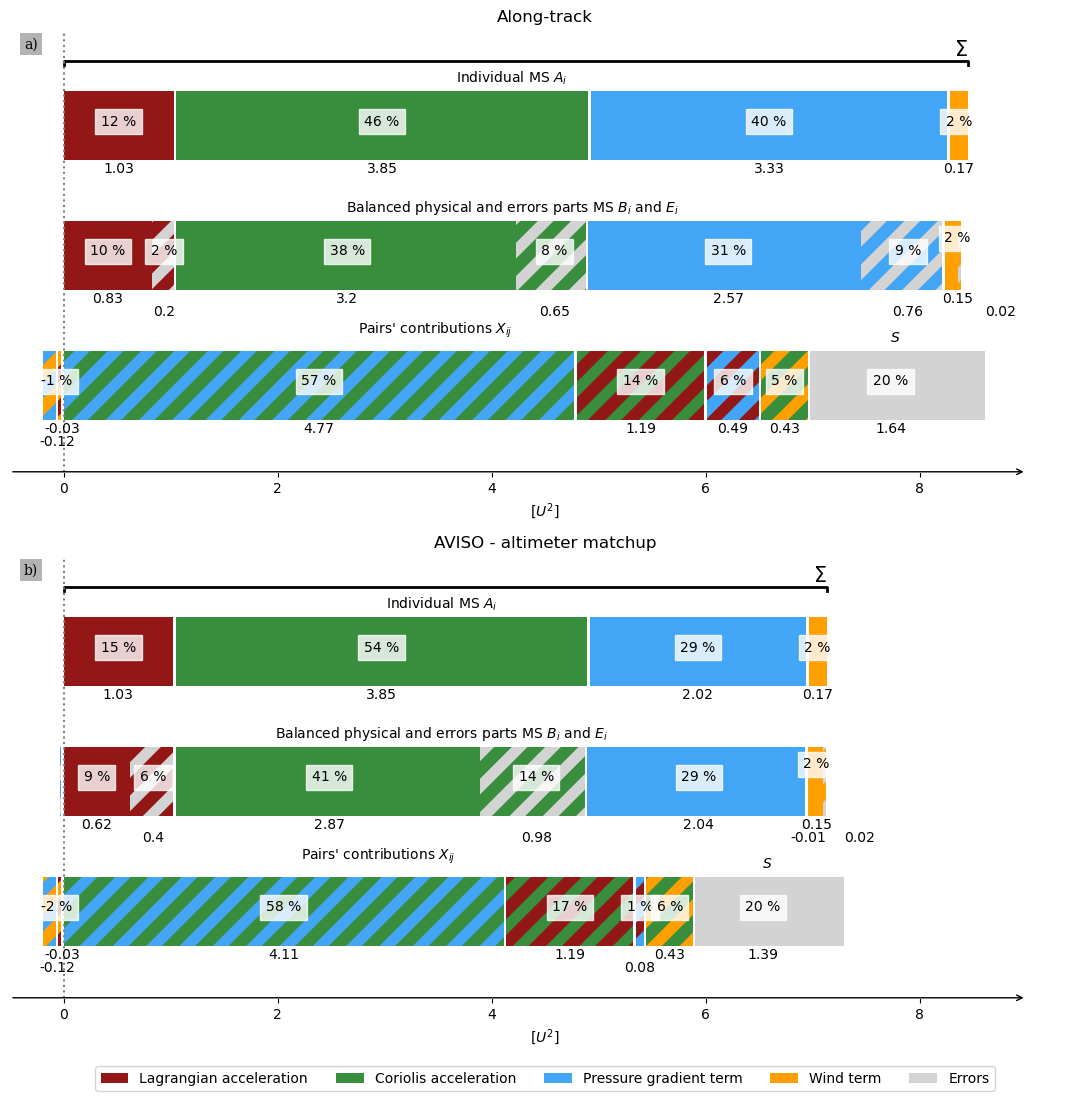

In [134]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(11,11), frameon=False, )
plt.rcParams["axes.edgecolor"] = "w"

synthetic_figure(dfalg.value, axs[0], xlim=9) 
synthetic_figure(dfa.value, axs[1], xlim=9, aviso=True) 

axs[0].set_title('Along-track')
axs[1].set_title('AVISO - altimeter matchup')

handles, labels = axs[0].get_legend_handles_labels()

put_fig_letter(fig, axs[0], 'a')
put_fig_letter(fig, axs[1], 'b')
fig.legend(handles, labels, ncol=5,loc='lower center')
fig.tight_layout(rect=[0,0.03,1,1])#left, bottom, right, top (default is 0,0,1,1)
#fig.savefig('../images_all/synth_samex_alti.png',bbox_inches='tight',   dpi=300)
#fig.savefig('../images_all/synth_samex_alti.jpeg',bbox_inches='tight',   dpi=300)